<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Hands-on Practice with Pandas and Matplotlib</p>



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi

%matplotlib inline

<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
1: Get the data and inspect it</p>
 
**Load the data** into a Pandas Dataframe. **Inspect all the columns**, and <b>read the data dictionary <a href="https://www.kaggle.com/c/titanic/data">on Kaggle</a></b> to understand their meaning. **Print the shape of the dataframe and its head**.

To avoid confusion, note that this isn't the exact same dataset from Kaggle. Kaggle just has a nicely formatted data dictionary.  The dataset we're using (<a href="http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets">source</a>) includes data on all available passengers as well as their lables. Kaggle's version does not, for reasons you can guess. 

In [2]:
titanic = pd.read_csv("./titanic_data.csv")
print(titanic.shape)
titanic.head()

(1309, 12)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
2: Clean the data</p>

Next, we want to remove rows with null values, as usual. However, first it may be a good idea to see if there are any columns that we can get rid of. Two reasons for wanting to do this are:<br>
1. If any columns have way too many NaN values, we should get rid of these. If we don't, we'll frivolously remove rows that only have NaN's in these columns, which we don't want to do.
2. Not all columns provide valuable information anyway

**Find the name of the column with the most missing values. Then, drop it from the DataFrame.**<br>
**Also, drop the ticket ticket column** because it's not useful to us.
Once these columns are removed, **drop any rows that have NaN in the remaining columns**

In [3]:
for col in titanic:
    print(col, len(titanic[titanic[col].isnull()]))

Unnamed: 0 0
pclass 0
survived 0
name 0
sex 0
age 263
sibsp 0
parch 0
ticket 0
fare 1
cabin 1014
embarked 2


In [4]:
try:
    titanic = titanic.drop(['cabin', 'ticket'], axis=1)
except KeyError:
    print("Already dropped")
titanic = titanic.dropna(axis=0)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S


<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
3: Do Some Visualizations</p>

First, lets see how age and travel class are related.<br> 
<b>Build a <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib hisogram</a></b> for ages by first, second and third class tickets. For the histogram(s)
<ul>
    <li>x-axis is age</li>
    <li>y-axis is occurences of passengers at that age in the given travel group</li>
    <li>The number of buckets you choose for the histogram is up to you</li>
</ul>

*Note: Remember to title your plots and label all your axes!*

(array([ 3.,  1.,  3., 19., 27., 25., 29., 42., 21., 41., 26., 20., 17.,
         3.,  3.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]),
 <BarContainer object of 15 artists>)

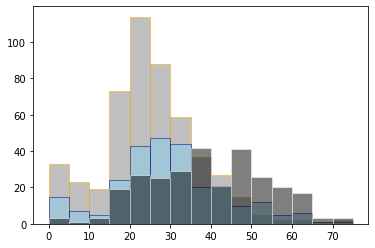

In [5]:
first_class = titanic.age[titanic.pclass == 1].dropna()
second_class = titanic.age[titanic.pclass == 2].dropna()
third_class = titanic.age[titanic.pclass == 3].dropna()
x_axis = range(0, int(titanic.age.max()))
x_labels = range(0, int(titanic.age.max()),5)
plt.hist(third_class, x_labels, color='grey', edgecolor='orange', alpha=0.5)
plt.hist(second_class, x_labels, color='skyblue', edgecolor='darkblue', alpha=0.5)
plt.hist(first_class, x_labels, color='black', edgecolor='white', alpha=0.5)


There were different locations from which passengers embarked. Build a <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib bar chart</a></b> where:<br>
<ul>
    <li>x-axis is location</li>
    <li>y-axis is occurences of passengers embarking at that location</li>
</ul>

S    781
C    212
Q     50
Name: embarked, dtype: int64


Text(0.5, 1.0, 'Passengers per boarding location')

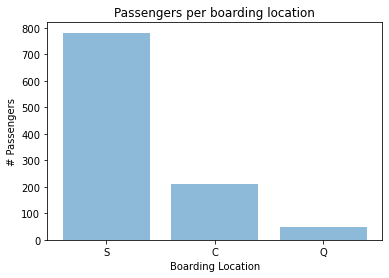

In [6]:
embarked = titanic.embarked.value_counts()
#ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
print(embarked)
plt.bar([0,1,2], embarked, align='center', alpha=0.5)
plt.xticks(range(0, len(embarked)), list(embarked.index))
plt.ylabel('# Passengers')
plt.xlabel('Boarding Location')
plt.title("Passengers per boarding location")

Time for a more morbid visualization. Build one <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">Matplotlib bar chart</a></b> that represents survival/casualty rates for males and females. This will requre you to plot 4 bars in total, where two bars will overlay the other two. The larger of each overlaid bar is the total count of that gender, and the smaller is the coun that survived.
<ul>
    <li>x-axis is gender</li>
    <li>y-axis is # of passengers</li>
    <li>2 bars for each gender<ul>
        <li>One bar represents total # passengers</li>
        <li>One bar represents # passengers that survived</li></ul>
    </li>
</ul>

**As an extra step,** try to break each gender down into groups based on their ticket class and print histograms for high and low class males and females

Male survival: 0.2054794520547945
Female survival: 0.7512953367875648


Text(0.5, 1.0, 'Passenger mortality rates')

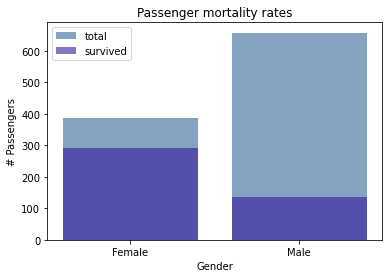

In [7]:
f_count = len(titanic[titanic.sex == 'female'])
f_survived = len(titanic[(titanic.sex == 'female') & (titanic.survived == 1)])
f_percentage = f_survived*1.0/f_count

m_count = len(titanic[titanic.sex == 'male'])
m_survived = len(titanic[(titanic.sex == 'male') & (titanic.survived == 1)])
m_percentage = m_survived*1.0/m_count

print('Male survival:', m_percentage)
print('Female survival:', f_percentage)

plt.bar([0,1], [f_count, m_count], align='center', color=(0.2, 0.4, 0.6, 0.6), label='total')
plt.bar([0,1], [f_survived, m_survived], align='center', color=(0.2, 0.1, 0.6, 0.6), label='survived')
plt.legend(loc='best')
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel('# Passengers')
plt.xlabel('Gender')
plt.title("Passenger mortality rates")

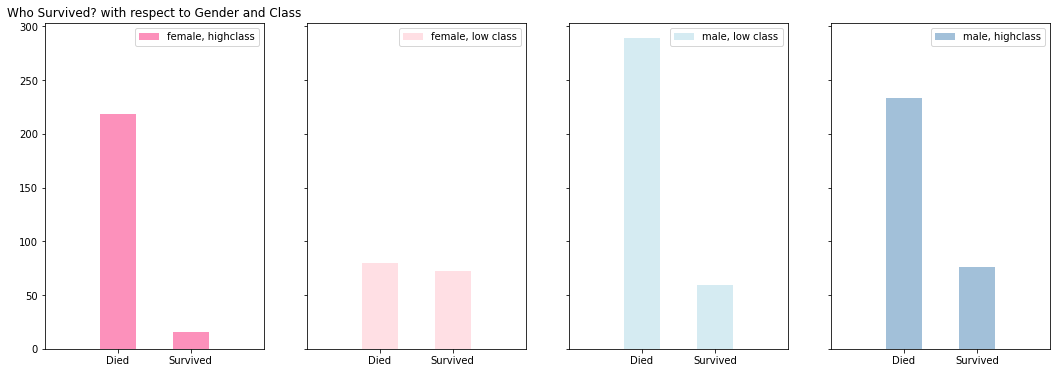

In [8]:
fig = plt.figure(figsize=(18,6))
df = titanic.copy()
alpha_level = 0.5
ax1=fig.add_subplot(141)
female_highclass = df.survived[df.sex == 'female'][df.pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Died", "Survived"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.survived[df.sex == 'female'][df.pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.survived[df.sex == 'male'][df.pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.survived[df.sex == 'male'][df.pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

<p style="font-family: Arial; font-size:1.3em;color:purple; font-style:bold"><br>
4: Predict survival</p>

Separate the data into it's features and labels. Since we're trying to predict survival rate, the labels will be the survival column. The features we'll use will exclude the name and passengerId, as they don't hold predictive value. Drop these two columns from your dataset. The result should be a (1309, 7) DataFrame called features and a (1309,) DataFrame called labels. 

In [9]:
titanic = titanic.drop(['name', 'embarked', 'sex'], axis=1, errors='ignore')
data = titanic.drop('survived', axis=1)
labels = titanic['survived']
print (data.shape, labels.shape)
print ('data:\n', data.head())
print ('labels:\n', labels.head())

(1043, 6) (1043,)
data:
    Unnamed: 0  pclass    age  sibsp  parch      fare
0           0       1  29.00      0      0  211.3375
1           1       1   0.92      1      2  151.5500
2           2       1   2.00      1      2  151.5500
3           3       1  30.00      1      2  151.5500
4           4       1  25.00      1      2  151.5500
labels:
 0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64


Now, **split your labels and data each into a train and test portion**. Note that it's important that train features and train labels align perfectly (same for test features and labels). Let's use 80% of the data for training

In [10]:
train_portion = int(len(data)*.8)

X_train = data.iloc[:train_portion]
y_train = labels.iloc[:train_portion]
X_test = data.iloc[train_portion:]
y_test = labels.iloc[train_portion:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train.head()

(834, 6) (834,)
(209, 6) (209,)


,Unnamed: 0,pclass,age,sibsp,parch,fare
0,0,1,29.00,0,0,211.3375
1,1,1,0.92,1,2,151.5500
2,2,1,2.00,1,2,151.5500
3,3,1,30.00,1,2,151.5500
4,4,1,25.00,1,2,151.5500


Now, fit a classifier to your training data. Let's use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">Logistic Regression</a>


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

/Users/boyan/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_test_predictions = pd.DataFrame(logit.predict(X_test))
accuracy_score(y_test, y_test_predictions)

0.7416267942583732